# Regression tree

Ce notebook est dédié à l'analyse des résultats obtenus avec un arbre de regression

Il fait appel au fichier python `regression_tree.py` qui définit le modèle, l'entraîne et prédit le jeu de test.


In [1]:
from regression_tree import main_regression_tree

In [2]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Run le modèle

Meilleur score = 0.026358, Meilleur paramètre = {'max_depth': 34}
Temps execution en secondes pour l'optimization: 425.027885421
Temps execution en secondes pour l'entrainement': 1.4655999962087662e-05
RMSE =  9.811897402949885
R2 =  0.9833924607508028
MAE =  5.17076765129013


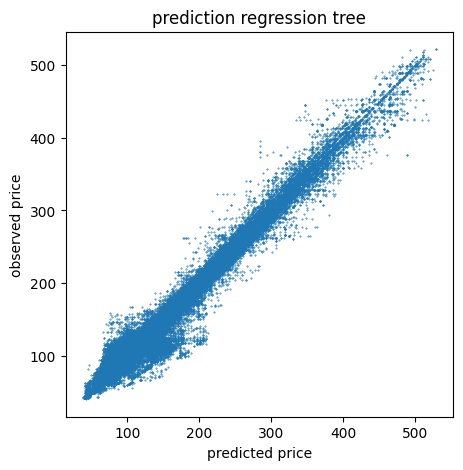

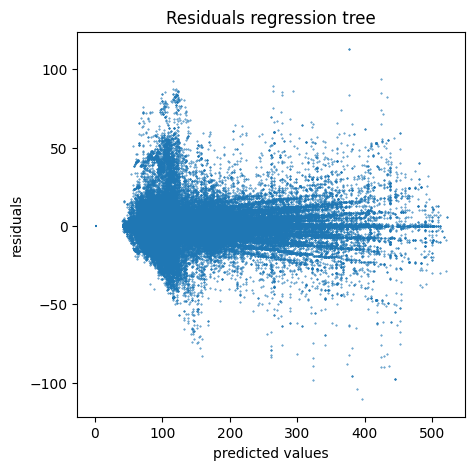

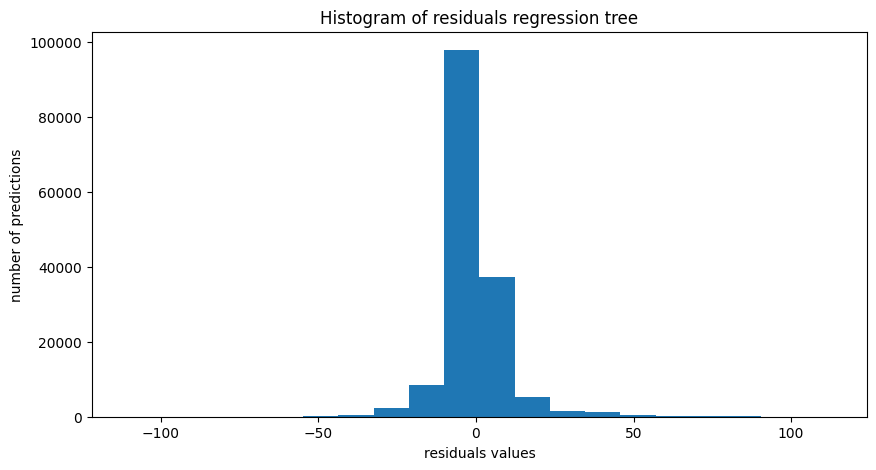

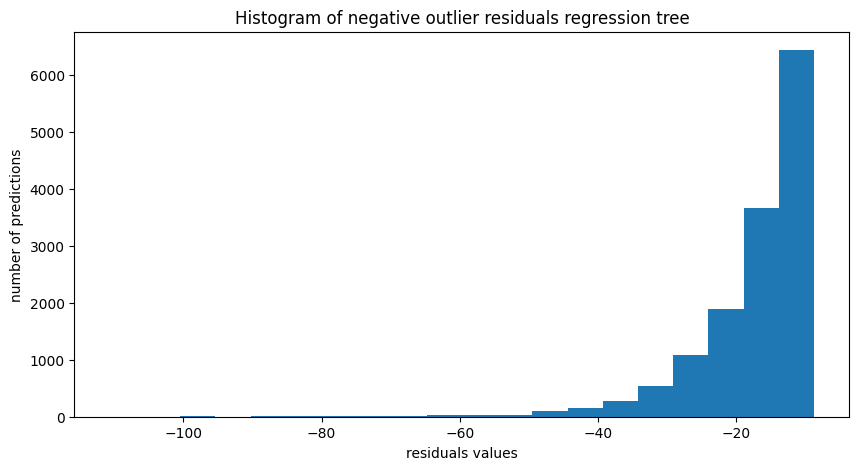

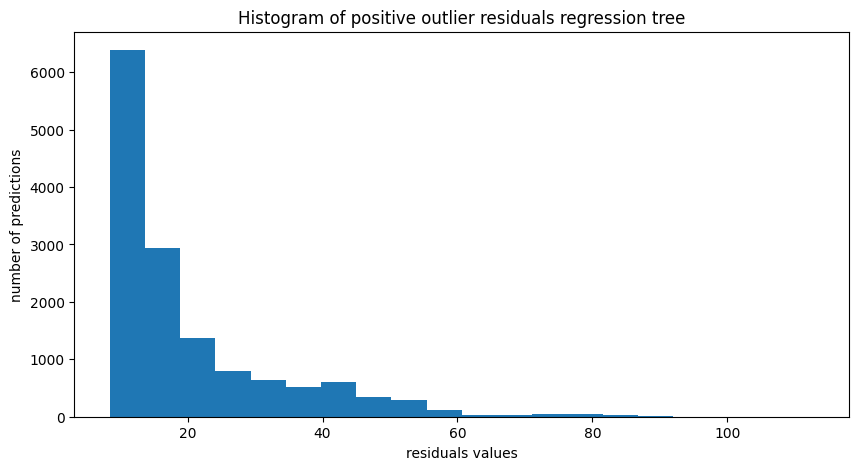

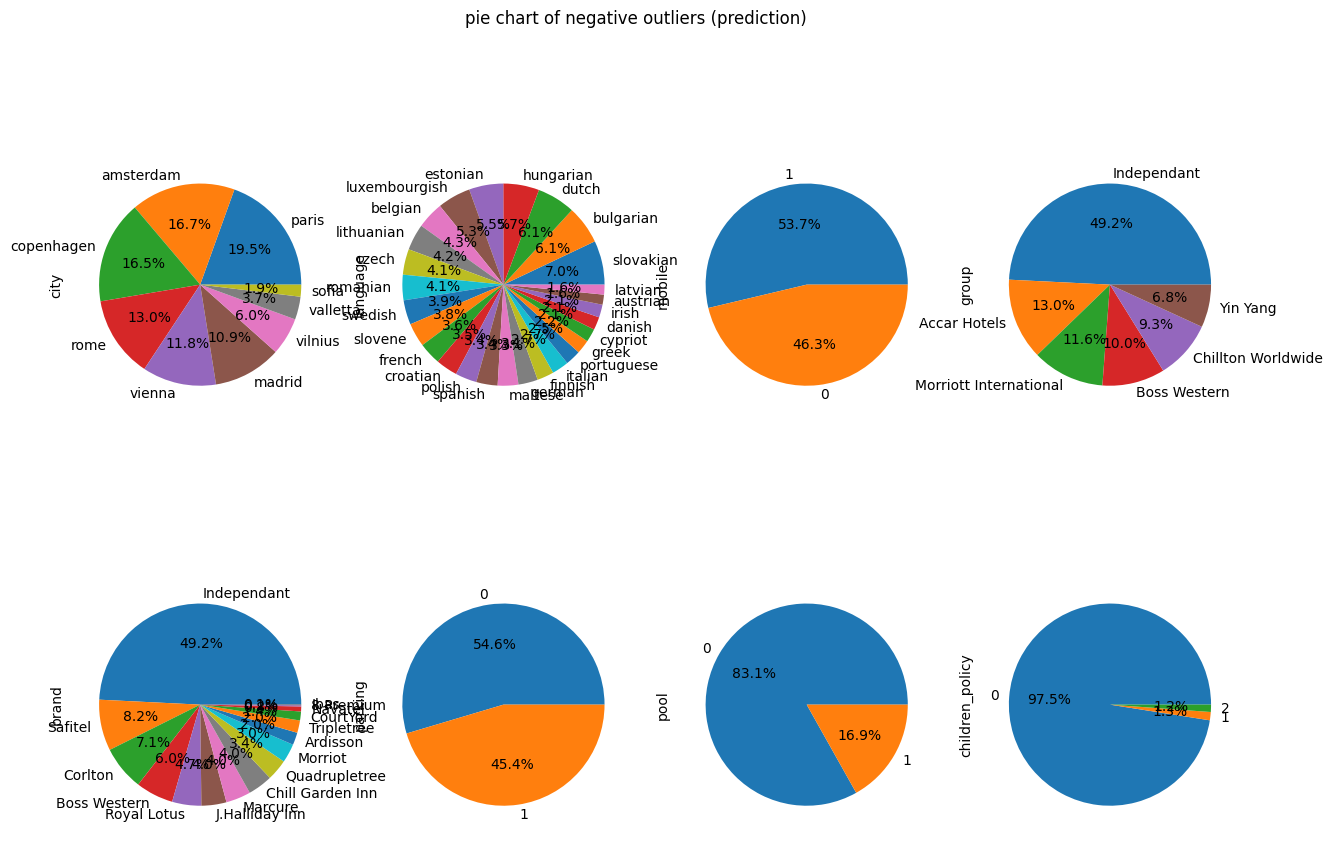

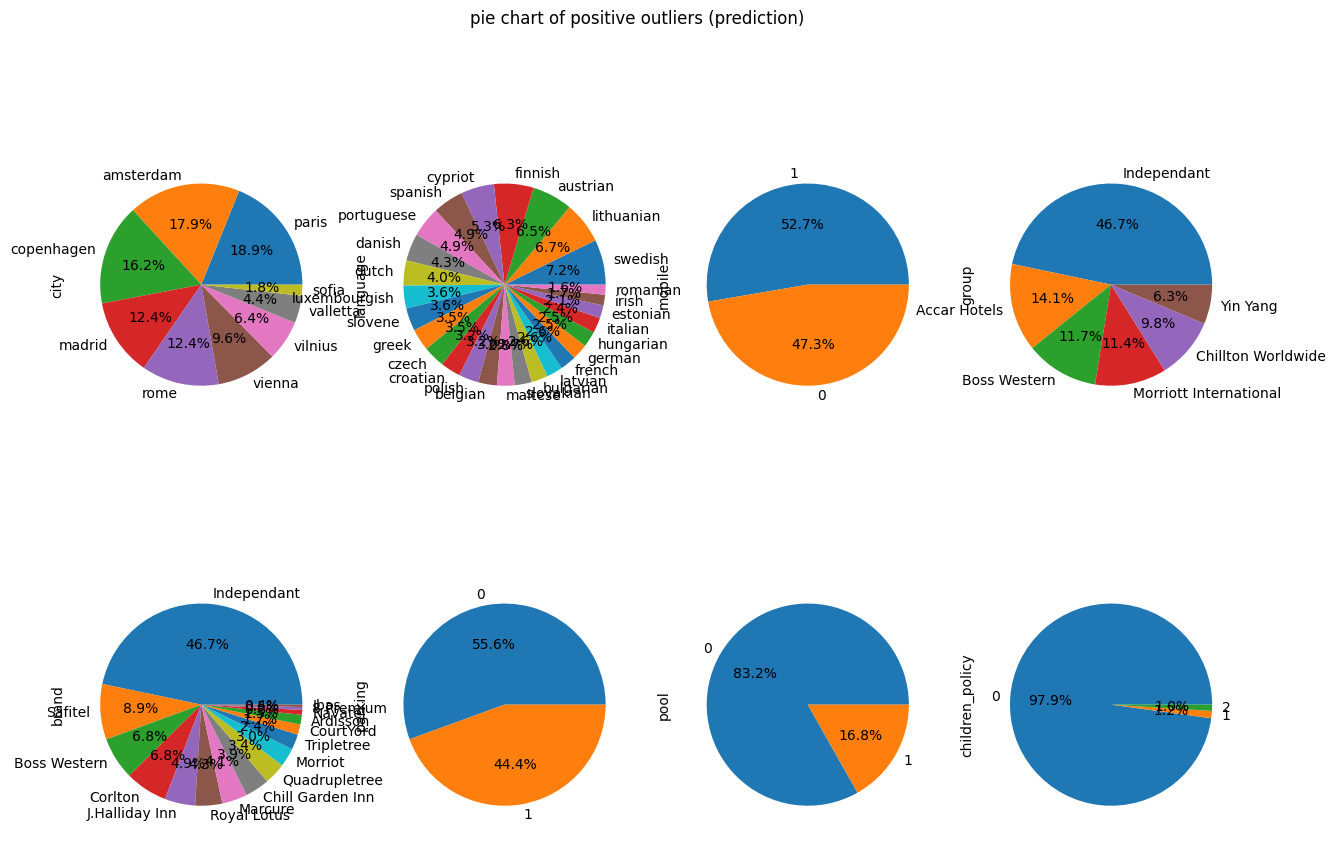

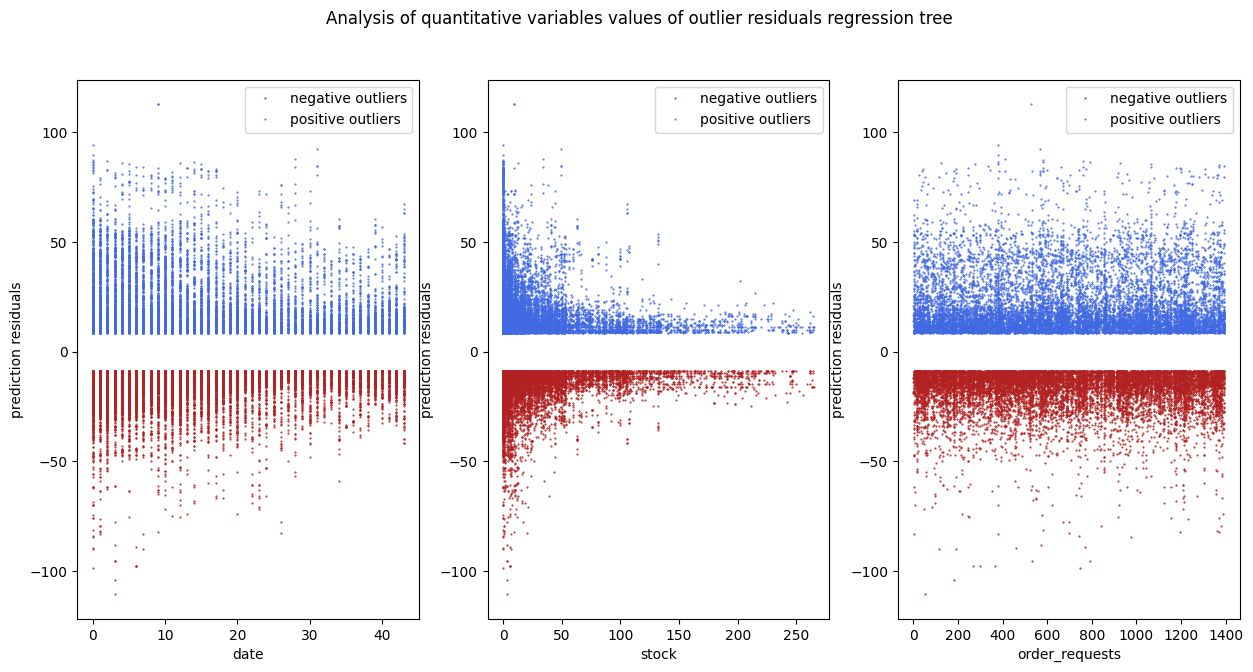

In [3]:
main_regression_tree(list_max_depth=np.arange(10,38,2))

# Analyse des résultats 

**Temps d'exécution :**
Temps execution en sec pour l'entrainement : 1.4655999962087662e-05

**Paramètres optimaux et sélection de variables :**
- La paramètre optimal est $max\_depth = 36$, calculé par un grid search. 
- Les variables les plus importantes sont brand_target, city_target, language_target, date et stock_mod

**Score sur l'échantillon de validation :**
- RMSE = 9.811897402949885
- R2 =  0.9833924607508028
- MAE = 5.17076765129013

Les scores sont meilleurs que les résultats obtenus en regression. Le modèle fournit une bonne prédiction du set de validation. 

**Analyse des graphiques :**
- Graphe 1 - observations réelles contre les prédictions : Dans l'idéal, se graphique doit se rapprocher le plus possible de la droite identité. On constate bien la présence d'une droite se rapprochant de f(x)=x. Lorsque les prix sont bas (entre 0 et 200€), le modèle fait plus d'erreur que lorsque les prix sont élevés. 

- Graphe 2 - résidus contre les valeurs prédites : Ce graphe confirme l'observation précédente, quand le prix à prédire est bas, le modèle fait plus d'erreur. On conste une forme en entonnoir du nuage de points vers les prix bas. Dans l'idéal on devrait avoir une répartition uniforme des points, et que les points soient proches de l'axe 0. Les valeurs des résidus sont plus élevées que pour le modèle linéaire. 

- Graphe 3 - Histogramme des résidus : Ce graphe est utilisé pour voir la répartition des erreurs sur les prédictions. On constate que la majeure partie des erreurs se situent de dans l'intervalle [-25,25]. Par ailleurs, le plus haut pic se trouve juste avant 0, le modèle aurait donc tendance à surestimer le prix puisque les résidus sont définits par : $résidus = valeurs\_réelles - valeurs\_predites$.

Les graphes suivants visent à analyser le type de données sur lesquelles portent les erreurs les plus grandes. En particulier on aimerait identifier les données pour lesquelles la prédiction est très mauvaise quand le prix à prédire est autour de 100-150E.

- Graphe 5 et 6 - Histogrammes des résidus outliers : Ce graphe montre la répartition des résidus qui sont des outliers, c'est-à-dire les résidus les plus importants. On remarque que la plupart ont une erreur de moins de 20€. Très peut de résidus ont une erreur supérieure à 60€. 

- Graphe 7 - Pie chart des résidus outliers négatifs : Ce graphe montre la répartition des modalités des variables qualitatives parmi les résidus outliers négatifs, c'est-à-dire pour lesquels le modèle a surestimé la valeur du prix de l'hotel. Ce graphe est à mettre en relation avec la répartition que l'on a sur le jeu de données complet, pour voir quelles sont les modalités les plus présentes dans les données qui ont étét prédites avec de grosses erreurs. On remarque en particulier que 
    - Les hotels indépendants sont présents dans 49.2% des données prédites avec beaucoup d'erreur, alors qu'ils ne représentent que 24.8% du jeu de données.
    - Les proportions des villes les plus grosses (Paris, Amsterdam, Copenhage) sont légèrement plus élevées que dans le jeu de données complets, le modèle a donc eu tendance à estimer sur ces villes des prix élevés pour des hotels qui sont en réalité moins chers. 
    
- Graphe 8 - Pie chart des résidus outliers positfs : Ce graphe montre la répartition des modalités des variables qualitatives parmi les résidus outliers positifs, c'est-à-dire pour lesquels le modèle a sous-estimé la valeur du prix de l'hotel. Ce graphe est à mettre en relation avec la répartition que l'on a sur le jeu de données complet, pour voir quelles sont les modalités les plus présentes dans les données qui ont étét prédites avec de grosses erreurs. On remarque en particulier que 
    - Les hotels indépendants sont présents dans 46.7% des données prédites avec beaucoup d'erreur, alors qu'ils ne représentent que 24.8% du jeu de données.
    - Les proportions des villes les plus grosses (Paris, Amsterdam, Copenhage) sont légèrement plus élevées que dans le jeu de données complets, le modèle a donc eu tendance à estimer sur ces villes des prix faibles pour des hotels qui sont en réalité plus chers. 
  
Ainsi, sur la base de ces observations, on peut conclure à une difficulté du modèle pour la prédiction du prix des hotels indépendants et dans les villes de Paris, Amsterdam et Copenhague. Ces villes sont les plus grandes du jeu de données, on peut supposer que la variabilité du prix des hotels dans ces villes est donc plus importante. En effet, on peut supposer que le prix d'un hotel dépend fortement de sa distance au centre. Comme ces villes sont les plus étendues, il peut exister un grand écart de prix entre un hotel du centre ville et de la périphérie. Or nous ne disposons pas de l'information de la situation géographique dans la ville. 

- Graphe 9 - Scatter plot des variables quantitatives pour les résidus outliers positifs et négatifs. Le but de ces graphes est de voir comment se répartissent les valeurs des résidus en fonction des valeurs des variables quantitatives. On remarque que : 
    - Plus le stock est faible, plus l'erreur de prédiction est grande. 
    - Plus la date est faible, plus l'erreur de prédiction est grande
    - Pour order request, l'erreur de prediction est sensiblement homogène quelle que soit la valeur. 

On conclut donc de ces observations, que notre modèle a plus de difficultés pour prédire la valeur du prix de l'hotel lorsque l'utilisateur fait la requête à une date proche de son départ. En effet, le nombre de lace dispobnible pour une date donnée décroit aussi au fur et à mesure que l'on s'approche de la date du voyage puisque l'hotel se remplit. Enfin, un point positif est que le modèle ne semble pas avoir plus de difficulté à prédire le prix d'un hotel pour un utilisateur qui fait plusieurs requêtes dans le temps ou une seule. 